## Partial Least Squares (PLS)

Partial Least Squares (PLS) is another method of dimensionality reduction. Like Principal Component Analysis (PCA), PLS reduces a dataset to uncorrelated components. The main difference between the two procedures is that PLS is a supervised method, so it accounts for the response variable when performing transformations.

To test out PLS for regression, the superconductivity dataset from the [UCI Machine Learning Repository]('https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data') will be used. This dataset contains 81 numerical predictor variables. The goal of this dataset is regression using the numerical features.

In [113]:
import pandas as pd
df = pd.read_csv(r"C:\Users\mkive\Documents\GitHub\Business-Analytics-Data-Mining\Business-Analytics-Data-Mining\Blog Entries\train.csv")

### Correlation Plot

The following plot is a correlation plot of all the predictor values. The data is highly collinear, so PLS regression will be used to predict the critical temparature.

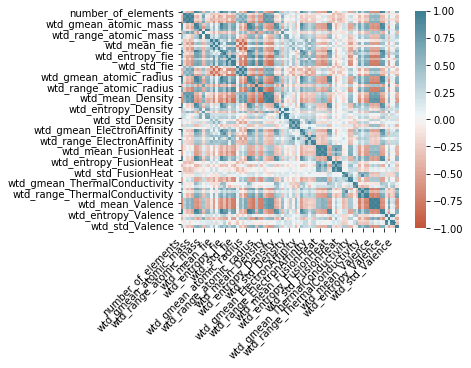

In [114]:
import seaborn as sns
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Partial Least Squares Regression (PLS)

The following code fits and evaluates a PLS regression model on the data. Using 26 PLS components results in the highest R-squared with the lowest amount of components. 

In [116]:
X = df.drop(['critical_temp'], axis=1)
Y = df['critical_temp']

In [117]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

pls = PLSRegression(n_components=26)
# Fit
pls.fit(X, Y)
# Cross-validation
y_cv = cross_val_predict(pls, X, Y, cv=10)
# Calculate scores
score = r2_score(Y, y_cv)
mse = mean_squared_error(Y, y_cv)
print('The R-squared score is ' + str(score))
print('The mean squared error is ' + str(mse))

The R-squared score is 0.7101507028149002
The mean squared error is 340.0819668805333
